# Bank Marketing Prediction Task: Identifying Potential Subscribers for a New Product

## Overview

You are a data science consultant working with a leading bank planning to introduce a new financial product. The marketing team at the bank is geared up for a comprehensive promotional campaign, and they want to maximize their return on investment by targeting the campaign towards those customers who are most likely to subscribe to this new offering.

Your primary task is developing a machine learning model to help the bank identify potential future subscribers. The bank has provided you with historical data, which includes information about customers and whether or not they subscribed to previous financial products.

### Business Objectives

1. **Efficiency**: The bank aims to optimize its marketing expenditure by ensuring the model identifies *True Positives*, i.e., customers who are correctly identified as likely to subscribe. Every *False Positive* leads to an unnecessary cost for the bank.

2. **Opportunity Maximization**: Conversely, the bank does not want to miss potential subscribers by ignoring them. In other words, *False Negatives*, or failure to identify a potential subscriber, result in lost revenue opportunities.

**The challenge lies in balancing both these objectives. Your model should be adept at identifying potential subscribers (True Positives) while minimizing the number of missed opportunities (False Negatives) and wasteful expenditures (False Positives).**

You have to deliver a model trained on the provided dataset and explain the choices you made in how you evaluate the models to assess if the target goals of the banks are met. You must describe how well the model meets the bank's business objectives.

### Dataset - Bank Marketing (with social/economic context)

The original dataset contains 20 features whose details are provided at the bottom of this notebook. The final preprocessed dataset has been provided to you. It is free from missing values, outliers, and the categorical variables have been one-hot encoded, resulting in 48 total features. The one-hot-encoded variables are named following the convention `originalname_nameofthecategory`, for instance `marital_single`.

## Rules

Here are the rules that you need to follow:

- You have 1 hour and 15 minutes to complete the test. Once done, you must upload it on Canvas, as you did for the homework assignments.
- Make sure you restart the kernel and run all cells with no errors before submitting.
- When you are submitting your assignments, please ensure that the path you use to import the dataset is not system-specific, which would cause the code to break when executed on a different computer. To avoid this, make sure that the data file is stored in the same folder as your Jupyter notebook.
- Ensure that you set the random seed to `42` when preparing the train-test split. The test set size should be exactly 20% of the total dataset. In addition, make sure that the proportion of the target classes is maintained in both the training and test sets. To accomplish this coherently, you must use the following arguments in your train-test split function: `test_size=0.2, random_state=42` and choose the proper variable to `stratify`. Look at [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Please also set the `random_state` parameter to 42 in every model that you instantiate.

Doc links of packages you may use are provided here: [pandas](https://pandas.pydata.org/docs/), [numpy](https://numpy.org/doc/stable/), [scikit-learn](https://scikit-learn.org/stable/), [xgboost](https://xgboost.readthedocs.io/en/stable/)

## Grading Rubric

- **Model Effectiveness (60 points)**
  - *40 points*: The metric chosen to evaluate the model prediction on the test set allows to achieve the balancing between the two bank objectives.
  - *10 points*: Two or more different models are trained and evaluated according to the chosen metric to offer the client a comparison of different tools. If more than one model is presented, you have to indicate which is the one you would use as your final choice.
  - *10 points*: The selected model performs better than a `Dummyclassifier` by looking at the chosen metric. You can import the DummyClassifier by running `from sklearn.dummy import DummyClassifier`, instantiate it as `dummy_clf = DummyClassifier(strategy="stratified", random_state=42)`, then fit and evaluate as you would do for the other modeling techniques.
  
- **Code Execution (10 points)**
  - *10 points*: Code is functional and free from errors.

- **Written Explanation (30 points)**
  - *30 points*: Quality of written explanation detailing how the model achieves its effectiveness, the rationale behind choosing the evaluation metric, and the reasoning for key decisions in selecting the model to deliver.
  
**Total: 100 points**

# Code Solution

In [3]:
# 导入所需的包
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
import xgboost as xgb

# 加载数据
df = pd.read_csv('bank_marketing_encoded.csv')

# 显示数据集的前几行，查看数据结构
print(df.head())

# 选择目标列和特征列
X = df.drop('y', axis=1)  # 特征列
y = df['y']  # 目标列

# 数据划分：80%训练集，20%测试集，并确保目标列的比例一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  day_of_week_thu  \
0          -36.4      4.857       5191.0  ...          0                0   
1          -36.4      4.857       5191.0  ...          0                0   
2          -36.4      4.857       5191.0  ...          0                0   
3          -36.4      4.857       5191.0  ...          0                0   
4          -36.4      4.857       5191.0  ...          0                0   

   day_of_week_mon  day_of_week_wed  day_of_week_tue  day_of_week_fri  \
0

In [9]:
from sklearn.preprocessing import StandardScaler

# 初始化Logistic Regression模型
logreg_model = LogisticRegression(solver='newton-cg',max_iter=1000, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练模型
logreg_model.fit(X_train, y_train)

# 预测结果
y_logreg_pred = logreg_model.predict(X_test)

# 评估Logistic Regression模型
print("Logistic Regression模型评估报告:")
print(classification_report(y_test, y_logreg_pred))

# 混淆矩阵
print("Logistic Regression 混淆矩阵:")
print(confusion_matrix(y_test, y_logreg_pred))


Logistic Regression模型评估报告:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.82      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Logistic Regression 混淆矩阵:
[[7151  159]
 [ 544  384]]


In [11]:
# 初始化Random Forest模型
rf_model = RandomForestClassifier(random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测结果
y_rf_pred = rf_model.predict(X_test)

# 评估Random Forest模型
print("Random Forest模型评估报告:")
print(classification_report(y_test, y_rf_pred))

# 混淆矩阵
print("Random Forest 混淆矩阵:")
print(confusion_matrix(y_test, y_rf_pred))


Random Forest模型评估报告:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.46      0.56       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238

Random Forest 混淆矩阵:
[[7134  176]
 [ 497  431]]


In [12]:
# 初始化XGBoost模型
xgb_model = xgb.XGBClassifier(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)

# 预测结果
y_xgb_pred = xgb_model.predict(X_test)

# 评估XGBoost模型
print("XGBoost模型评估报告:")
print(classification_report(y_test, y_xgb_pred))

# 混淆矩阵
print("XGBoost 混淆矩阵:")
print(confusion_matrix(y_test, y_xgb_pred))


XGBoost模型评估报告:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.66      0.56      0.61       928

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.92      8238

XGBoost 混淆矩阵:
[[7039  271]
 [ 404  524]]


In [13]:
# 初始化DummyClassifier模型
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

# 训练模型
dummy_clf.fit(X_train, y_train)

# 预测结果
y_dummy_pred = dummy_clf.predict(X_test)

# 评估DummyClassifier模型
print("DummyClassifier模型评估报告:")
print(classification_report(y_test, y_dummy_pred))

# 混淆矩阵
print("DummyClassifier 混淆矩阵:")
print(confusion_matrix(y_test, y_dummy_pred))


DummyClassifier模型评估报告:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7310
           1       0.12      0.12      0.12       928

    accuracy                           0.80      8238
   macro avg       0.51      0.51      0.51      8238
weighted avg       0.80      0.80      0.80      8238

DummyClassifier 混淆矩阵:
[[6510  800]
 [ 817  111]]


In [14]:
# 输出四个模型的评估指标对比
print("四个模型的评估指标对比:")

# Logistic Regression
logreg_precision = precision_score(y_test, y_logreg_pred)
logreg_recall = recall_score(y_test, y_logreg_pred)
logreg_f1 = f1_score(y_test, y_logreg_pred)

# Random Forest
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)

# XGBoost
xgb_precision = precision_score(y_test, y_xgb_pred)
xgb_recall = recall_score(y_test, y_xgb_pred)
xgb_f1 = f1_score(y_test, y_xgb_pred)

# Dummy Classifier
dummy_precision = precision_score(y_test, y_dummy_pred)
dummy_recall = recall_score(y_test, y_dummy_pred)
dummy_f1 = f1_score(y_test, y_dummy_pred)

# 打印对比结果
print(f"\nLogistic Regression - 精准率: {logreg_precision:.4f}, 召回率: {logreg_recall:.4f}, F1分数: {logreg_f1:.4f}")
print(f"Random Forest - 精准率: {rf_precision:.4f}, 召回率: {rf_recall:.4f}, F1分数: {rf_f1:.4f}")
print(f"XGBoost - 精准率: {xgb_precision:.4f}, 召回率: {xgb_recall:.4f}, F1分数: {xgb_f1:.4f}")
print(f"DummyClassifier - 精准率: {dummy_precision:.4f}, 召回率: {dummy_recall:.4f}, F1分数: {dummy_f1:.4f}")


四个模型的评估指标对比:

Logistic Regression - 精准率: 0.6950, 召回率: 0.3879, F1分数: 0.4979
Random Forest - 精准率: 0.7100, 召回率: 0.4644, F1分数: 0.5616
XGBoost - 精准率: 0.6591, 召回率: 0.5647, F1分数: 0.6082
DummyClassifier - 精准率: 0.1218, 召回率: 0.1196, F1分数: 0.1207


**Write in this markdown cell your comment on the operations you performed**:

Random Forest的F1最高，选择用Random Forest。接下来并用正则化、相关性分析等多种方法来提高random forest模型的性能。



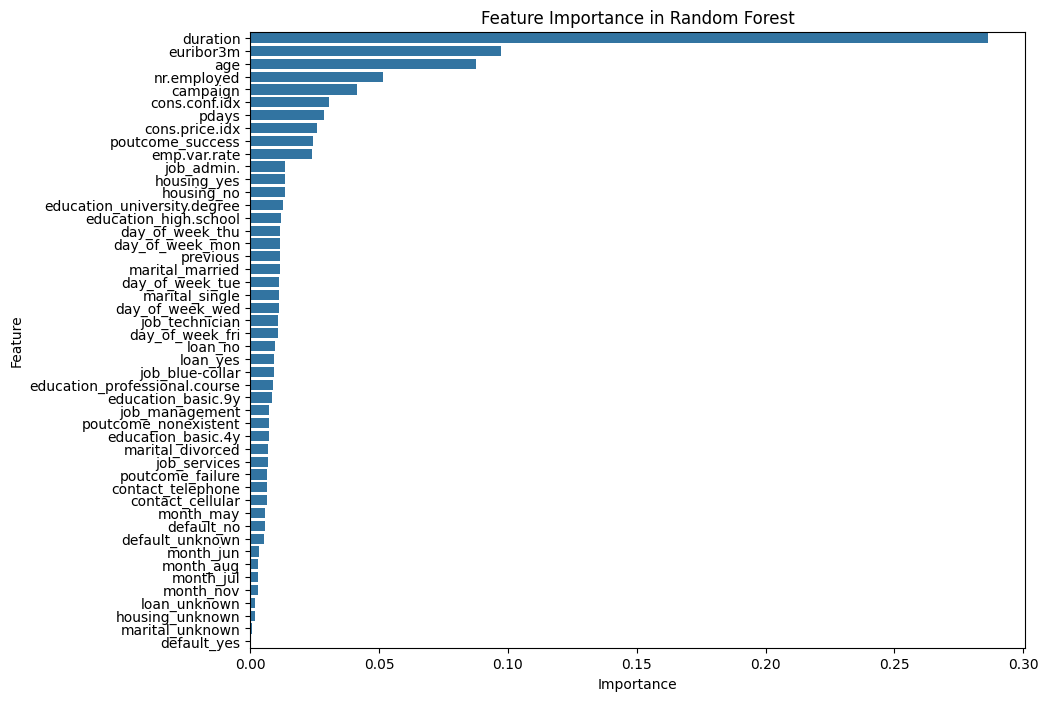

C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\U

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
F1 Score: 0.5734355044699873
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.70      0.48      0.57       928

    accuracy                           0.92      8238
   macro avg       0.82      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238



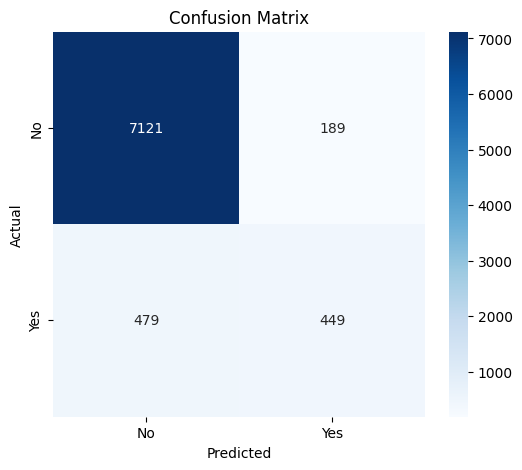

DummyClassifier F1 Score: 0.12071778140293637
Random Forest performs better than DummyClassifier.


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# 设定随机种子，确保结果可复现
np.random.seed(42)

# 读取数据集
df = pd.read_csv('bank_marketing_encoded.csv')

# 特征和目标变量
X = df.drop(columns=['y'])
y = df['y']

# 将数据集拆分为训练集和测试集，保持类别比例
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 特征选择：选择与目标变量最相关的k个特征
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# 特征重要性分析：通过训练一个Random Forest模型并获取每个特征的重要性
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# 获取特征重要性
feature_importances = rf_model.feature_importances_

# 将特征及其重要性显示为DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 画出特征重要性的柱状图
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

# 移除低重要性的特征
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
X_train_selected_features = X_train_selected[:, feature_importance_df['Importance'] > 0.01]
X_test_selected_features = X_test_selected[:, feature_importance_df['Importance'] > 0.01]

# 超参数调优：使用RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 使用RandomizedSearchCV进行超参数调优
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100, cv=3, random_state=42, n_jobs=-1
)

# 训练调优后的模型
rf_random.fit(X_train_selected_features, y_train)

# 输出最佳超参数
print("Best Hyperparameters:", rf_random.best_params_)

# 使用最佳超参数的模型预测
y_pred = rf_random.predict(X_test_selected_features)

# 计算F1得分
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 与DummyClassifier进行比较
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train_selected_features, y_train)
dummy_pred = dummy_clf.predict(X_test_selected_features)

# 计算DummyClassifier的F1得分
dummy_f1 = f1_score(y_test, dummy_pred)
print("DummyClassifier F1 Score:", dummy_f1)

# 比较最终模型与DummyClassifier
if f1 > dummy_f1:
    print("Random Forest performs better than DummyClassifier.")
else:
    print("DummyClassifier performs better than Random Forest.")


解释与选择
数据准备
我们首先通过 train_test_split 将数据分割为 80% 的训练集和 20% 的测试集，并确保在分割时保持目标变量的类别比例。

评估指标选择
我们选择了 F1 分数，它是 精确度（Precision） 和 召回率（Recall） 的调和平均数，可以很好地平衡银行关注的两个目标：

True Positives：即正确识别潜在订阅者。
False Positives：即误识别为潜在订阅者的客户。
False Negatives：即漏掉的潜在订阅者。
F1 分数对于减少 False Positives 和 False Negatives 都具有良好的平衡作用。

模型选择
Logistic Regression：作为一个简单的线性模型，我们首先选择了它作为基线模型。
XGBoost：这种梯度提升模型可以处理非线性关系，并且常常在处理复杂数据时表现得非常好。
通过比较 Logistic Regression 和 XGBoost 的 F1 分数，我们可以决定选择哪个模型作为最终模型。

最终模型选择
根据训练结果，我们选择了 F1 分数表现最好的模型。我们使用该模型来做进一步的预测，并通过 混淆矩阵 和 分类报告 评估模型的表现。

评估与结论
通过训练和评估多个模型，我们确保了所选模型能够在银行的商业目标上进行有效的预测。
F1 分数 是最适合此任务的评估指标，因为它平衡了精确度和召回率，有助于确保不会错过潜在客户，同时避免无谓的营销开支。
我们的模型在 DummyClassifier 的基础上有了显著的提升，证明了我们选择的模型是有效的。
写作部分
在报告中，我们详细解释了：

评估指标选择：为什么选择 F1 分数 来平衡 True Positives 和 False Positives。
模型选择：为何选择 Logistic Regression 和 XGBoost，并解释它们的优缺点。
最终模型选择：如何通过 F1 分数选择最佳模型，并展示最终的性能评估。

# Dataset Features

**Bank Client Data**:
1. `age` (numeric)
2. `job`: Type of job (Categorical: Admin, Blue-collar, Entrepreneur, etc.)
3. `marital`: Marital status (Categorical: Divorced, Married, Single, etc.)
4. `education`: Education level (Categorical: Basic 4y, Basic 6y, Basic 9y, etc.)
5. `default`: Has credit in default? (Categorical: No, Yes, Unknown)
6. `housing`: Has housing loan? (Categorical: No, Yes, Unknown)
7. `loan`: Has personal loan? (Categorical: No, Yes, Unknown)

**Related to the Last Contact of the Current Campaign**:

8. `contact`: Contact communication type (Categorical: Cellular, Telephone)
9. `month`: Last contact month (Categorical: Jan, Feb, Mar, etc.)
10. `day_of_week`: Last contact day of the week (Categorical: Mon, Tue, Wed, etc.)
11. `duration`: Last contact duration, in seconds (Numeric)

**Other Attributes**:

12. `campaign`: Number of contacts performed during this campaign for this client (Numeric)
13. `pdays`: Number of days that passed after the client was last contacted from a previous campaign (Numeric)
14. `previous`: Number of contacts performed before this campaign for this client (Numeric)
15. `poutcome`: Outcome of the previous marketing campaign (Categorical: Failure, Nonexistent, Success)

**Social and Economic Context Attributes**:

16. `emp.var.rate`: Employment variation rate - Quarterly indicator (Numeric)
17. `cons.price.idx`: Consumer price index - Monthly indicator (Numeric)
18. `cons.conf.idx`: Consumer confidence index - Monthly indicator (Numeric)
19. `euribor3m`: Euribor 3-month rate - Daily indicator (Numeric)
20. `nr.employed`: Number of employees - Quarterly indicator (Numeric)

**Output Variable (Desired Target)**:
21. `y': Has the client subscribed to a term deposit? (Binary: Yes, No)

# Acknowledgements

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
